# Testing the camera

In this short notebook, we are going to test the camera. To see if it is correctly connected and the focus is ok.

With the machine assembeled:

- Place a small LEGO brick in front of the camera.
- Turn on the lights.

In [1]:
from picamera2 import Picamera2, Preview
import time

picam2 = Picamera2()
# using the default configuration for now
camera_config = picam2.create_preview_configuration()
picam2.configure(camera_config)

[0:14:49.353670078] [1198]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[0:14:49.469955870] [1220]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[0:14:49.476758574] [1220]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/imx477@1a to Unicam device /dev/media3 and ISP device /dev/media1
[0:14:49.476901646] [1220]  INFO RPI pipeline_base.cpp:1144 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[0:14:49.488152209] [1198]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[0:14:49.582487980] [1223]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[0:14:49.589148278] [1223]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/imx477@1a to Unicam device /dev/media3 and ISP device /dev/media1
[0:14:49.589263647] [1223]  INFO RPI pipeline_base.cpp:1144 Using configuration file '/usr/share/libcamera/pipeline/r

In [2]:
# Start the preview and camera
picam2.start_preview(Preview.NULL)
picam2.start()
time.sleep(2)

In [7]:
# Capture to a file
picam2.capture_file("test.jpg")

{'SensorTimestamp': 1046124652000,
 'ExposureTime': 2396,
 'ScalerCrop': (2, 0, 4052, 3040),
 'AnalogueGain': 1.0,
 'DigitalGain': 1.002074122428894,
 'FrameDuration': 24994,
 'SensorBlackLevels': (4096, 4096, 4096, 4096),
 'Lux': 5272.66845703125,
 'SensorTemperature': 27.0,
 'AeLocked': True,
 'ColourGains': (3.381953001022339, 1.4627007246017456),
 'ColourTemperature': 6489,
 'FocusFoM': 977,
 'ColourCorrectionMatrix': (2.227972984313965,
  -0.9624283909797668,
  -0.2655445337295532,
  -0.34653007984161377,
  2.1186819076538086,
  -0.7721489071846008,
  -0.16204789280891418,
  -0.4414617717266083,
  1.603506088256836)}

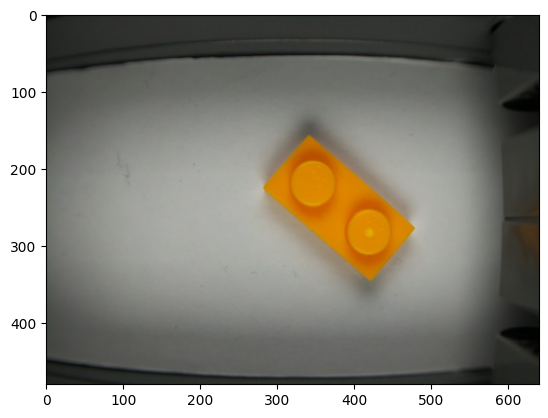

In [8]:
import cv2
from matplotlib import pyplot as plt

img=cv2.imread('test.jpg')
img_clr = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
plt.imshow(img_clr)

Note: If you are working with Jupyter notebooks inside PyCharm and you have a dark theme, you may need to disable the following option to make the image look correct:
File > Settings > Languages & Frameworks > Jupyter > (untick) Invert image outputs for dark themes

In [11]:
# Capture to an in-memory array
array = picam2.capture_array("main")

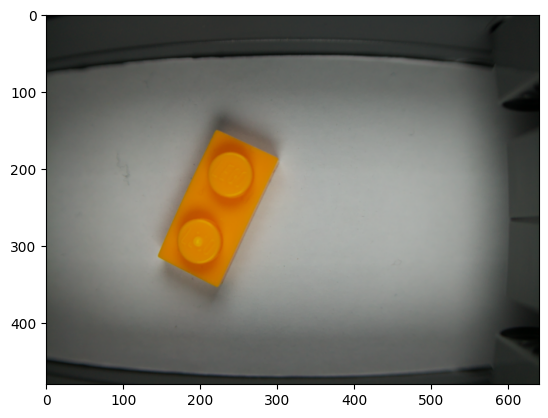

In [12]:
plt.imshow(array)

In [13]:
# Fully release the camera
picam2.stop()
picam2.stop_preview()
picam2.close()